# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="Tennis.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]
# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)
# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)
# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.0
Score (max over agents) from episode 2: 0.09000000171363354
Score (max over agents) from episode 3: 0.10000000149011612
Score (max over agents) from episode 4: 0.0
Score (max over agents) from episode 5: 0.0


In [7]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [6]:
from maddpg import MADDPG
from ddpg import *
import os
import matplotlib.pyplot as plt
%matplotlib inline

model_dir= os.getcwd()+"/model_dir"
os.makedirs(model_dir, exist_ok=True)

In [7]:
number_of_episodes = 5000
buffer_size = 1000000
batch_size = 64
lr_actor = 0.001
lr_critic = 0.0001
tau = 0.008
gamma = 0.99
update_every = 1
update_steps = 1
noise = 2
noise_reduction = 0.97
seed = 0

In [2]:
np.random.seed(seed)
torch.manual_seed(seed)
maddpg = MADDPG(gamma,tau,buffer_size,batch_size,update_every,update_steps,noise,noise_reduction,lr_actor,lr_critic)

scores_deque = deque(maxlen=100)
scores_all = []
scores_mean = []
best_mean = -1000
solved_state = False

for episode in range(1,number_of_episodes+1): 
    env_info = env.reset(train_mode=True)[brain_name]
    observations = env_info.vector_observations
    scores = np.zeros(num_agents)
    while True:
        maddpg.reset_noises()
        actions = maddpg.act(observations)
        env_info = env.step(actions)[brain_name]
        next_observations = env_info.vector_observations
        rewards = env_info.rewards
        dones = env_info.local_done
        transition = (observations, actions, rewards, next_observations, dones)
        maddpg.step(transition)
        scores += rewards
        observations = next_observations
        if np.any(dones):
            break
    max_score = np.max(scores)
    scores_deque.append(max_score)
    avg_score = np.mean(scores_deque)
    scores_all.append(max_score)
    scores_mean.append(avg_score)
    if avg_score >= 0.5 and avg_score>best_mean:
        if not solved_state:
            print(f'\nSolved at Episode {episode} - Average Score of the last 100 episodes: {avg_score}')
            solved_state = True
        maddpg.save_weights(model_dir)
        best_mean = avg_score
    if (episode)%100==0:
        avg_score = np.round(np.mean(scores_deque),3)
        print(f'Episode {format(episode, "04d")} - Average Score of the last 100 episodes: {avg_score}')

Episode 0100 - Average Score of the last 100 episodes: 0.0
Episode 0200 - Average Score of the last 100 episodes: 0.004
Episode 0300 - Average Score of the last 100 episodes: 0.009
Episode 0400 - Average Score of the last 100 episodes: 0.002
Episode 0500 - Average Score of the last 100 episodes: 0.036
Episode 0600 - Average Score of the last 100 episodes: 0.054
Episode 0700 - Average Score of the last 100 episodes: 0.04
Episode 0800 - Average Score of the last 100 episodes: 0.054
Episode 0900 - Average Score of the last 100 episodes: 0.051
Episode 1000 - Average Score of the last 100 episodes: 0.057
Episode 1100 - Average Score of the last 100 episodes: 0.063
Episode 1200 - Average Score of the last 100 episodes: 0.092
Episode 1300 - Average Score of the last 100 episodes: 0.109
Episode 1400 - Average Score of the last 100 episodes: 0.113
Episode 1500 - Average Score of the last 100 episodes: 0.093
Episode 1600 - Average Score of the last 100 episodes: 0.086
Episode 1700 - Average Scor

### 5. Plot Results

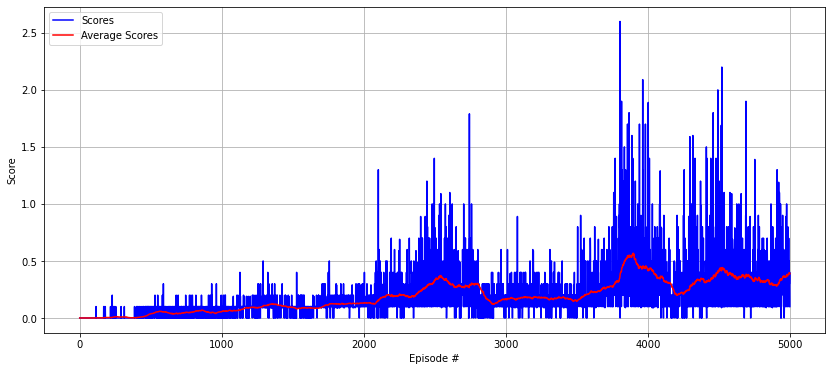

In [10]:
# plot the scores
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores_all)), scores_all, c='b', label='Scores')
plt.plot(np.arange(len(scores_mean)), scores_mean, c='r', label='Average Scores')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left');
plt.grid()
plt.savefig('./plots/plot.png')
plt.show()

### 6. Watch Trained Agents

In [6]:
from maddpg import MADDPG
from ddpg import *
import os
model_dir= os.getcwd()+"/model_dir"

In [10]:
max_episodes = 10
maddpg_trained = MADDPG(noise=0)
maddpg_trained.load_weights(model_dir)
random_actions = False

for i in range(1, max_episodes+1):
    env_info = env.reset(train_mode=False)[brain_name]
    scores = np.zeros(num_agents)
    while True:
        states = env_info.vector_observations
        if random_actions : 
            actions = np.random.randn(num_agents, action_size)
        else:
            actions = maddpg_trained.act(states)
        env_info = env.step(actions)[brain_name]
        scores += env_info.rewards
        states = env_info.vector_observations
        if any(env_info.local_done):
            break
    print(f'\rEpisode {i}\tScore: {scores.max()}\t')

Episode 1	Score: 1.2000000178813934	
Episode 2	Score: 0.5000000074505806	
Episode 3	Score: 0.10000000149011612	
Episode 4	Score: 0.19000000320374966	
Episode 5	Score: 1.700000025331974	
Episode 6	Score: 0.20000000298023224	
Episode 7	Score: 0.2900000046938658	
Episode 8	Score: 1.3000000193715096	
Episode 9	Score: 0.30000000447034836	
Episode 10	Score: 1.4000000208616257	
